In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [85]:
df_houseprice=pd.read_csv("/Users/frankzhong/Downloads/ECO225/ECO225PROJECT/Data/housing.csv")
df_houseprice

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


### Check for missing values

In [86]:
df_houseprice.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [87]:
df_houseprice[df_houseprice.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500,NEAR OCEAN
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400,NEAR OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700,<1H OCEAN
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100,<1H OCEAN


In [88]:
print(df_houseprice['ocean_proximity'].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


### Impute the missing values using the average based on location of the house with respect to ocean


In [89]:
#Create a new dataframe with only columns of 'total_bedrooms' and 'ocean_proximity'
new_house = df_houseprice[['total_bedrooms', 'ocean_proximity']]
new_house

,total_bedrooms,ocean_proximity
0,129.0,NEAR BAY
1,1106.0,NEAR BAY
2,190.0,NEAR BAY
3,235.0,NEAR BAY
4,280.0,NEAR BAY
...,...,...
20635,374.0,INLAND
20636,150.0,INLAND
20637,485.0,INLAND
20638,409.0,INLAND


In [90]:
#Computed the average total bedrooms within a block based on location of the house with respect to ocean
result = new_house.groupby('ocean_proximity').mean()
result

,total_bedrooms
ocean_proximity,
<1H OCEAN,546.539185
INLAND,533.881619
ISLAND,420.400000
NEAR BAY,514.182819
NEAR OCEAN,538.615677


In [91]:
#Imputed the average to the new_house dataframe
for i in range(len(new_house)):
    if pd.isnull(new_house['total_bedrooms'][i]):
        new_house['total_bedrooms'][i] = result['total_bedrooms'][new_house['ocean_proximity'][i]]

/var/folders/hv/0dhczwp15297zx47dnz76l040000gn/T/ipykernel_27378/898462846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_house['total_bedrooms'][i] = result['total_bedrooms'][new_house['ocean_proximity'][i]]


In [92]:
new_house.isnull().sum()

total_bedrooms     0
ocean_proximity    0
dtype: int64

In [93]:
#Merge the imputed column to the original dataframe
df_houseprice['total_bedrooms'] = new_house['total_bedrooms']
df_houseprice.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Summary Statistic

In [94]:
df_houseprice.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.880892,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.267735,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Remove Outliers

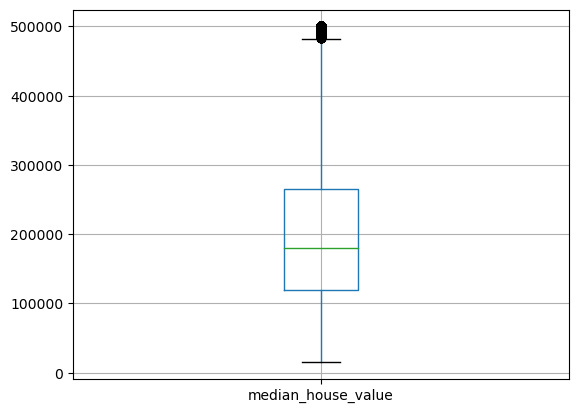

In [95]:
df_houseprice.boxplot(column='median_house_value')
plt.show()

In [112]:
len(df_houseprice)

20640

In [113]:
q1 = df_houseprice["median_house_value"].quantile(0.25)
q3 = df_houseprice["median_house_value"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_houseprice2 = df_houseprice[(df_houseprice["median_house_value"] > lower_bound) & (df_houseprice["median_house_value"] < upper_bound)]

In [114]:
q1 = df_houseprice2["housing_median_age"].quantile(0.25)
q3 = df_houseprice2["housing_median_age"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_houseprice3 = df_houseprice2[(df_houseprice["housing_median_age"] > lower_bound) & (df_houseprice2["housing_median_age"] < upper_bound)]


/var/folders/hv/0dhczwp15297zx47dnz76l040000gn/T/ipykernel_27378/513318550.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_houseprice3 = df_houseprice2[(df_houseprice["housing_median_age"] > lower_bound) & (df_houseprice2["housing_median_age"] < upper_bound)]


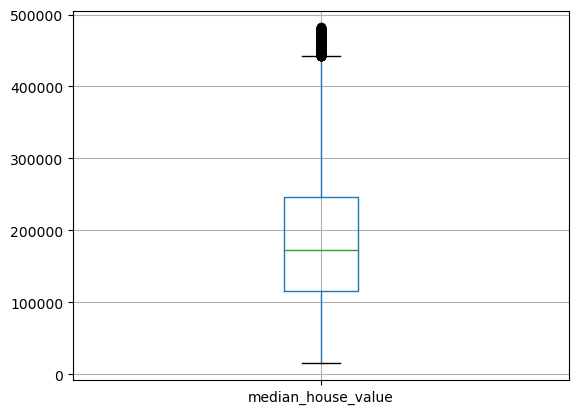

In [115]:
#Why is there still outlier after removing
df_houseprice2.boxplot(column='median_house_value')
plt.show()

In [116]:
len(df_houseprice2)

19569

### Log outlier data

### 4) Plots

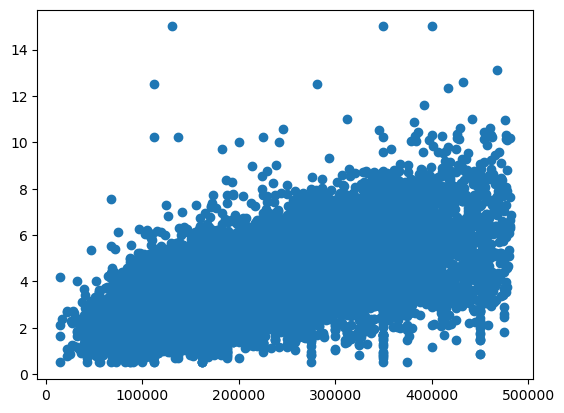

In [117]:
plt.scatter(df_houseprice2.median_house_value,df_houseprice2.median_income)
plt.show()

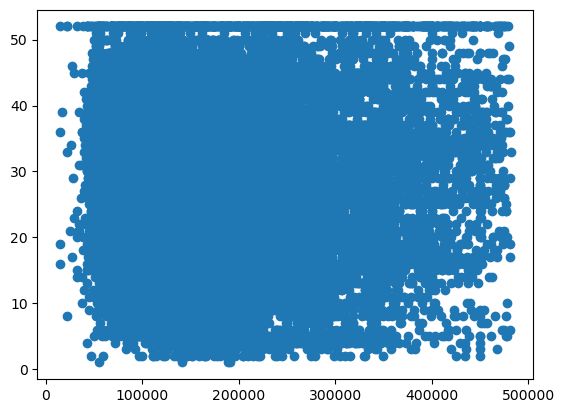

In [118]:
plt.scatter(df_houseprice2.median_house_value,df_houseprice2.housing_median_age)
plt.show()

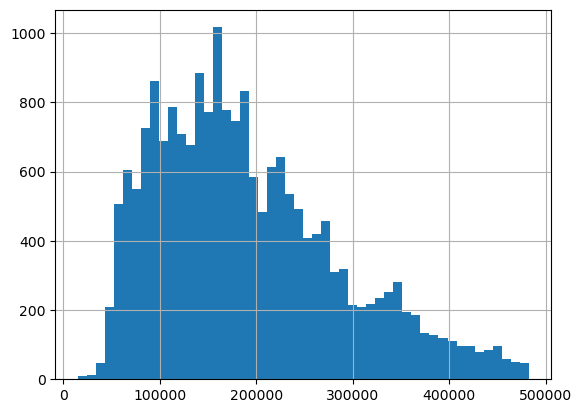

In [119]:
df_houseprice2['median_house_value'].hist(bins=50)
plt.show()

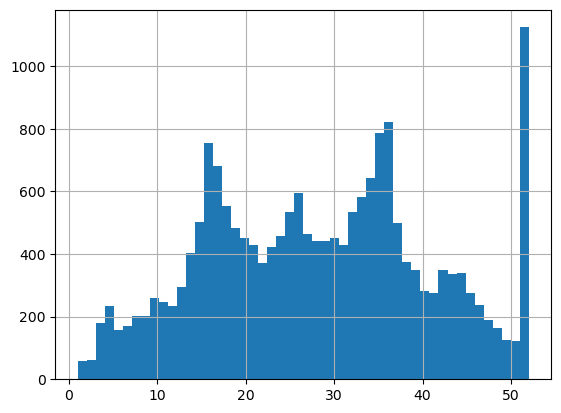

In [120]:
df_houseprice2['housing_median_age'].hist(bins=50)
plt.show()